In [2]:
import os
import re
from matplotlib import pyplot as plt
import vrplib
def plot_CVRP_solution(routes, node_coords):
    plt.figure(figsize=(10, 8))

    # Plot nodes
    for i, (x, y) in enumerate(node_coords):
        plt.scatter(x, y, c='blue' if i == 0 else 'red')
        plt.text(x, y, f'{i}', fontsize=9, ha='right')
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    for vehicle, route in enumerate(routes):
        route_coords = [node_coords[node] for node in route]
        x_coords, y_coords = zip(*route_coords)
        plt.plot(x_coords, y_coords, c=colors[vehicle % len(colors)], label=f'Vehicle {vehicle + 1}')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routing Problem Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

def read_all_instances(root_folder, ending='.vrp'):
    instances = []
    for file_name in os.listdir(root_folder):
        if file_name.endswith(ending):
            instance = vrplib.read_instance(os.path.join(root_folder, file_name))
            if instance:
                instances.append(instance)
                print(f'Successfully read {file_name}')
            else:
                print(f'Failed to read {file_name}')
    return instances

def read_cvrp_data(file_name, ending='.vrp'):
    if file_name.endswith(ending):
        instance = vrplib.read_instance( file_name)
        if instance:
            print(f'Successfully read {file_name}')
        else:
            print(f'Failed to read {file_name}')
    data = {}
    # 基础参数设置
    data["vehicle_capacity"] = instance['capacity']
    data["num_vehicles"] = int(re.search(r'k(\d+)', instance['name']).group(1))
    data["depot"] = 0
    data['locations'] = [tuple(row) for row in instance['node_coord'].tolist()]
    data["num_locations"] = len(data["locations"])
    data['demands'] = instance['demand']
    data['distance_matrix']= instance['edge_weight']
    return data

question = read_cvrp_data('A-n80-k10.vrp')
print(question)

Successfully read A-n80-k10.vrp
{'vehicle_capacity': 100, 'num_vehicles': 10, 'depot': 0, 'locations': [(92, 92), (88, 58), (70, 6), (57, 59), (0, 98), (61, 38), (65, 22), (91, 52), (59, 2), (3, 54), (95, 38), (80, 28), (66, 42), (79, 74), (99, 25), (20, 43), (40, 3), (50, 42), (97, 0), (21, 19), (36, 21), (100, 61), (11, 85), (69, 35), (69, 22), (29, 35), (14, 9), (50, 33), (89, 17), (57, 44), (60, 25), (48, 42), (17, 93), (21, 50), (77, 18), (2, 4), (63, 83), (68, 6), (41, 95), (48, 54), (98, 73), (26, 38), (69, 76), (40, 1), (65, 41), (14, 86), (32, 39), (14, 24), (96, 5), (82, 98), (23, 85), (63, 69), (87, 19), (56, 75), (15, 63), (10, 45), (7, 30), (31, 11), (36, 93), (50, 31), (49, 52), (39, 10), (76, 40), (83, 34), (33, 51), (0, 15), (52, 82), (52, 82), (46, 6), (3, 26), (46, 80), (94, 30), (26, 76), (75, 92), (57, 51), (34, 21), (28, 80), (59, 66), (51, 16), (87, 11)], 'num_locations': 80, 'demands': array([ 0, 24, 22, 23,  5, 11, 23, 26,  9, 23,  9, 14, 16, 12,  2,  2,  6,
   

## V1

Successfully read A-n80-k10.vrp
Vehicle 0 route: [0, 49, 73, 36, 42, 51, 77, 3, 29, 31, 0]
  Distance: 157.42, Load: 100/100
Vehicle 1 route: [0, 40, 21, 1, 7, 10, 71, 14, 33, 0]
  Distance: 245.26, Load: 100/100
Vehicle 2 route: [0, 13, 53, 66, 67, 70, 38, 58, 50, 76, 0]
  Distance: 168.26, Load: 100/100
Vehicle 3 route: [0, 74, 60, 39, 17, 27, 59, 0]
  Distance: 161.43, Load: 99/100
Vehicle 4 route: [0, 62, 23, 44, 12, 5, 30, 6, 0]
  Distance: 171.93, Load: 100/100
Vehicle 5 route: [0, 63, 11, 34, 24, 2, 37, 8, 68, 0]
  Distance: 223.80, Load: 99/100
Vehicle 6 route: [0, 72, 45, 22, 32, 4, 54, 9, 15, 64, 47, 0]
  Distance: 339.50, Load: 100/100
Vehicle 7 route: [0, 52, 28, 79, 48, 18, 78, 20, 0]
  Distance: 253.18, Load: 100/100
Vehicle 8 route: [0, 46, 25, 41, 55, 56, 69, 65, 35, 26, 19, 75, 16, 0]
  Distance: 310.71, Load: 98/100
Vehicle 9 route: [0, 61, 57, 43, 0]
  Distance: 223.96, Load: 46/100

Total distance: 2255.46
Vehicles used: 10/10


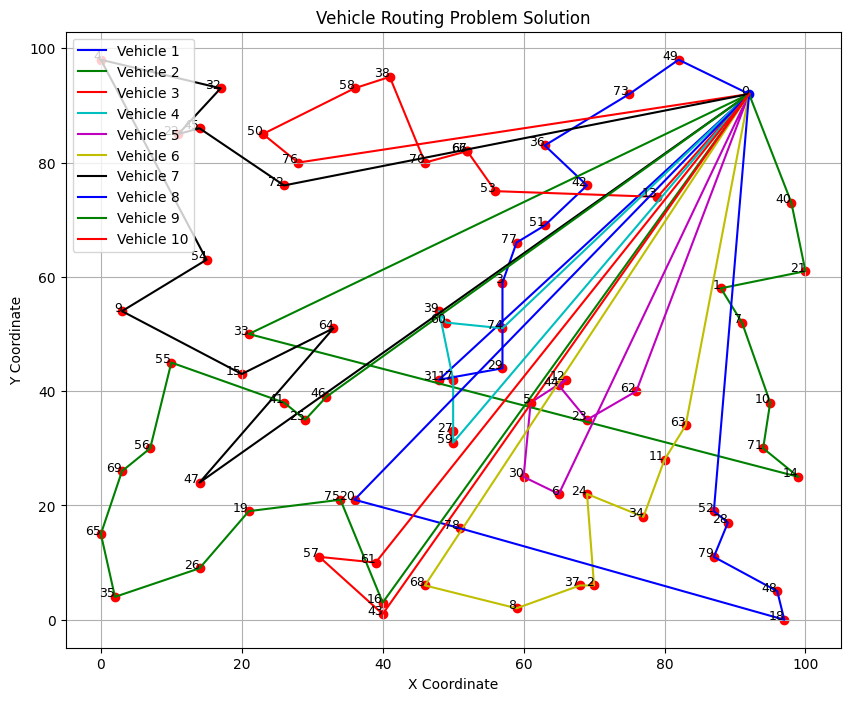

2255.461886842152

In [39]:
import itertools
import numpy as np

class FunSearch:
    def run(self, func):
        return func

    def evolve(self, func):
        return func
funsearch = FunSearch()

def solve(data):
    """Main CVRP solver using priority-based greedy heuristic"""
    num_vehicles = data['num_vehicles']
    depot = data['depot']
    demands = data['demands']
    capacity = data['vehicle_capacity']
    distance_matrix = data['distance_matrix']
    
    unvisited = set(range(len(distance_matrix))) - {depot}
    routes = [[] for _ in range(num_vehicles)]
    vehicle_loads = [0] * num_vehicles

    for vehicle_id in range(num_vehicles):
        current_node = depot
        current_route = [depot]
        current_load = 0

        while True:
            remaining_capacity = capacity - current_load
            candidates = [
                node for node in unvisited 
                if demands[node] <= remaining_capacity
            ]
            if not candidates:
                break

            # 使用进化优化的priority函数选择节点
            scores = [
                priority((current_node, node),  # 节点对作为元素
                distance_matrix[current_node][node],  # 作为n参数
                demands[node]  # 作为w参数
                ) for node in candidates
            ]
            next_node = candidates[scores.index(min(scores))]

            current_route.append(next_node)
            current_load += demands[next_node]
            unvisited.remove(next_node)
            current_node = next_node

        current_route.append(depot)
        routes[vehicle_id] = current_route
        vehicle_loads[vehicle_id] = current_load

    # 二次分配剩余节点（使用最小插入成本策略）
    while unvisited:
        node = unvisited.pop()
        best_cost = float('inf')
        best_vehicle = None
        
        for v_id in range(num_vehicles):
            if vehicle_loads[v_id] + demands[node] > capacity:
                continue
                
            # 计算最优插入位置
            for i in range(1, len(routes[v_id])):
                prev = routes[v_id][i-1]
                succ = routes[v_id][i]
                cost = (
                    distance_matrix[prev][node] +
                    distance_matrix[node][succ] -
                    distance_matrix[prev][succ]
                )
                if cost < best_cost:
                    best_cost = cost
                    best_vehicle = v_id
                    insert_pos = i
        
        if best_vehicle is not None:
            routes[best_vehicle].insert(insert_pos, node)
            vehicle_loads[best_vehicle] += demands[node]

    return routes

@funsearch.run
def evaluate(data) -> float:
    """评估解决方案并返回总行驶距离，同时输出详细路径信息"""
    routes = solve(data)
    total_distance = 0.0
    distance_matrix = data['distance_matrix']
    depot = data['depot']
    demands = data['demands']
    capacity = data['vehicle_capacity']
    
    # 计算总距离并验证解决方案
    for i, route in enumerate(routes):
        if len(route) < 2 or route[0] != depot or route[-1] != depot:
            raise ValueError(f"Invalid route {i}: {route} - must start and end at depot")
        
        route_distance = 0.0
        route_demand = 0
        for j in range(len(route)-1):
            from_node = route[j]
            to_node = route[j+1]
            route_distance += distance_matrix[from_node][to_node]
            if to_node != depot:  # 仓库需求为0
                route_demand += demands[to_node]
        
        if route_demand > capacity:
            raise ValueError(f"Route {i} overloaded: {route_demand}/{capacity}")
        
        total_distance += route_distance
        print(f"Vehicle {i} route: {route}")
        print(f"  Distance: {route_distance:.2f}, Load: {route_demand}/{capacity}")

    print(f"\nTotal distance: {total_distance:.2f}")
    print(f"Vehicles used: {sum(1 for r in routes if len(r) > 2)}/{len(routes)}")  # 排除空路线
    plot_CVRP_solution(routes, data['locations'])

    return total_distance

@funsearch.evolve
def priority(el: tuple[int, int], n: float, w: int) -> float:
    """Evolutionary priority scoring function (n=当前距离, w=需求)"""
    return n  # 基础公式：距离/需求

question = read_cvrp_data('A-n80-k10.vrp')
evaluate(question)

Successfully read A-n45-k6.vrp
Vehicle 0 route: [0, 1, 35, 14, 38, 31, 44, 0]
  Distance: 165.99, Load: 100/100
Vehicle 1 route: [0, 28, 7, 13, 20, 3, 10, 41, 0]
  Distance: 179.01, Load: 100/100
Vehicle 2 route: [0, 29, 43, 18, 17, 37, 0]
  Distance: 144.70, Load: 100/100
Vehicle 3 route: [0, 23, 15, 22, 16, 4, 42, 39, 2, 0]
  Distance: 196.08, Load: 99/100
Vehicle 4 route: [0, 6, 24, 27, 40, 30, 34, 19, 9, 0]
  Distance: 206.94, Load: 100/100
Vehicle 5 route: [0, 25, 12, 36, 8, 33, 21, 5, 32, 26, 11, 0]
  Distance: 352.89, Load: 94/100

Total distance: 1245.62
Vehicles used: 6/6


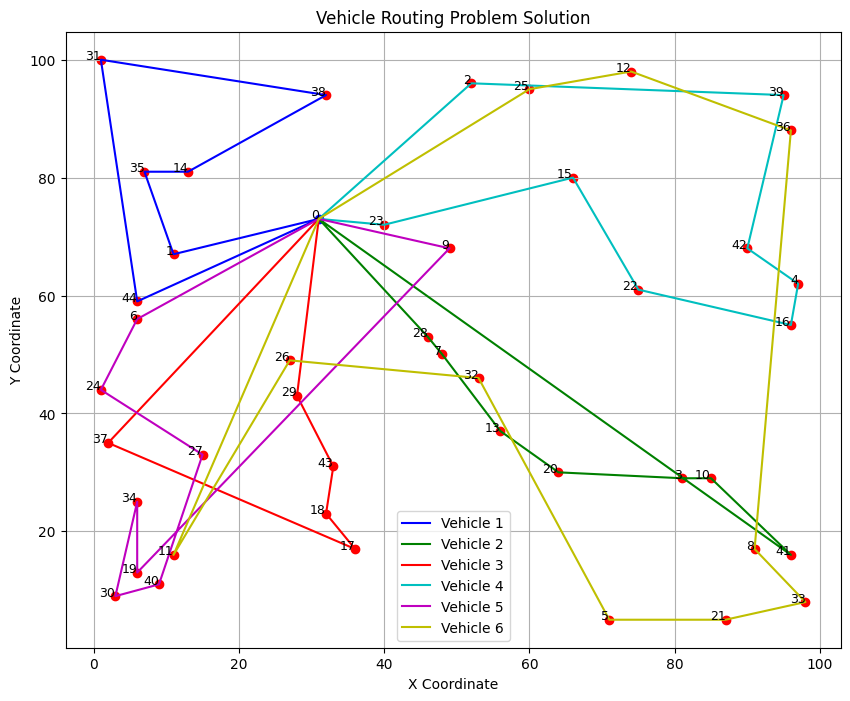

1245.6161593397176

In [34]:

@funsearch.evolve
def priority(el: tuple[int, int], n: float, w: int) -> float:
    """Evolutionary priority scoring function (n=当前距离, w=需求)"""
    return n / (w + 1e-6)  # 基础公式：距离/需求

question = read_cvrp_data('A-n45-k6.vrp')
evaluate(question)

Successfully read A-n45-k6.vrp
Vehicle 0 route: [0, 23, 28, 7, 32, 13, 20, 10, 42, 0]
  Distance: 178.66, Load: 100/100
Vehicle 1 route: [0, 1, 44, 6, 24, 37, 11, 19, 9, 0]
  Distance: 170.72, Load: 100/100
Vehicle 2 route: [0, 38, 14, 35, 31, 29, 26, 0]
  Distance: 163.46, Load: 99/100
Vehicle 3 route: [0, 15, 25, 2, 12, 36, 39, 4, 3, 41, 0]
  Distance: 287.29, Load: 98/100
Vehicle 4 route: [0, 43, 18, 17, 40, 30, 34, 0]
  Distance: 161.70, Load: 99/100
Vehicle 5 route: [0, 22, 16, 8, 33, 21, 5, 27, 0]
  Distance: 250.27, Load: 97/100

Total distance: 1212.10
Vehicles used: 6/6


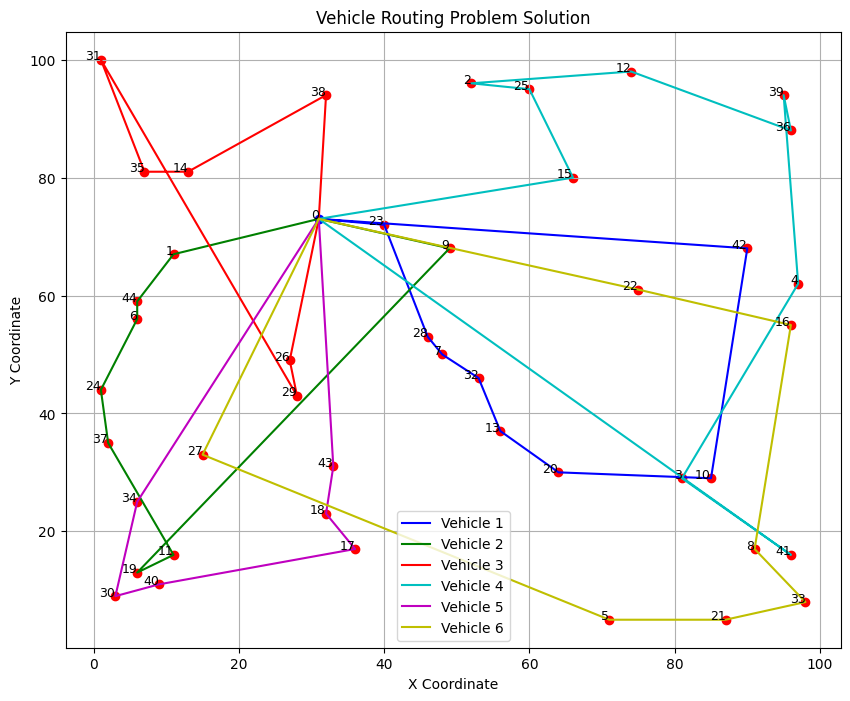

1212.0979675611209

In [37]:
@funsearch.evolve
def priority(el: tuple[int, int], n: float, w: int) -> float:
    """Evolutionary priority scoring function with parametric flexibility"""
    # 基础参数（通过演化自动调整）
    alpha = 0.1   # 距离权重系数 [0.5-1.5]
    beta = 0.7     # 需求调节系数 [0.2-0.8]
    gamma = 1.8    # 非线性因子 [0.5-2.0]
    
    # 动态调节项（基于需求特征）
    demand_term = (w ** beta) + 1e-6
    distance_term = (n ** gamma) 
    
    # 复合优先级公式
    base_priority = distance_term / demand_term
    
    # 非线性修正项
    correction = alpha * (n * w) ** 0.5
    
    return base_priority + correction

question = read_cvrp_data('A-n45-k6.vrp')
evaluate(question)

In [ ]:
from dataclasses import dataclass
from typing import Dict, Any

@dataclass
class RoutingContext:
    """路线规划上下文信息容器"""
    current_node: int
    candidate_node: int
    distance: float
    demand: int
    current_load: int
    remaining_capacity: int
    vehicle_id: int
    global_demands: tuple  # 元组形式保证可哈希
    capacity: int
    route_history: tuple   # 当前路径历史

def solve(data: Dict[str, Any]):
    # ...其他代码保持不变...
    
    for vehicle_id in range(num_vehicles):
        current_node = depot
        current_route = [depot]
        current_load = 0

        while True:
            remaining_capacity = capacity - current_load
            candidates = [node for node in unvisited if demands[node] <= remaining_capacity]
            if not candidates:
                break

            # 构建完整的上下文信息
            contexts = [
                RoutingContext(
                    current_node=current_node,
                    candidate_node=node,
                    distance=distance_matrix[current_node][node],
                    demand=demands[node],
                    current_load=current_load,
                    remaining_capacity=remaining_capacity,
                    vehicle_id=vehicle_id,
                    global_demands=tuple(demands),  # 转换为元组保证可哈希
                    capacity=capacity,
                    route_history=tuple(current_route)
                ) for node in candidates
            ]

            # 使用带完整上下文的优先级计算
            scores = [priority(ctx) for ctx in contexts]
            next_node = candidates[scores.index(min(scores))]
            
            # ...后续操作保持不变...

@funsearch.evolve
def priority(ctx: RoutingContext) -> float:
    """可演化的优先级计算函数"""
    # 基础参数（通过演化调整）
    alpha = 0.85
    beta = 1.2
    gamma = 0.3
    
    # 复合计算公式
    distance_term = ctx.distance ** beta
    demand_term = (ctx.demand + 1e-6) ** alpha
    load_factor = (ctx.capacity - ctx.remaining_capacity) / ctx.capacity
    
    # 动态权重调整
    return (distance_term / demand_term) * (1 + gamma * load_factor)

In [ ]:

from openai import OpenAI

client = OpenAI(api_key="<DeepSeek API Key>", base_url="https://api.deepseek.com")

response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant"},
        {"role": "user", "content": "Hello"},
    ],
    stream=False
)

print(response.choices[0].message.content)

In [22]:
import numpy as np
from dataclasses import dataclass
from typing import Tuple, List

class FunSearch:
    def run(self, func):
        return func

    def evolve(self, func):
        return func
funsearch = FunSearch()

@dataclass
class RoutingContext:
    current_node: int
    candidate_node: int
    distance: float
    demand: int
    current_load: int
    remaining_capacity: int
    vehicle_id: int
    global_demands: Tuple[int, ...]
    capacity: int
    route_history: Tuple[int, ...]
    all_routes: Tuple[Tuple[int, ...], ...]
    distance_matrix: np.ndarray
    depot: int
    locations: np.ndarray

def solve(data: dict) -> List[List[int]]:
    """基于完整上下文的进化车辆路径规划"""
    # 初始化基础参数
    num_vehicles = data['num_vehicles']
    depot = data['depot']
    demands = data['demands']
    capacity = data['vehicle_capacity']
    distance_matrix = data['distance_matrix']
    locations = data.get('locations', np.zeros((len(demands), 2)))
    
    unvisited = set(range(len(distance_matrix))) - {depot}
    routes = [[] for _ in range(num_vehicles)]
    vehicle_loads = [0] * num_vehicles

    # 第一阶段：上下文感知路径构建
    for vid in range(num_vehicles):
        current_node = depot
        current_route = [depot]
        current_load = 0
        
        while True:
            remaining_cap = capacity - current_load
            candidates = [n for n in unvisited if demands[n] <= remaining_cap]
            if not candidates:
                break
            
            # 生成候选上下文
            frozen_routes = tuple(tuple(r) for r in routes)
            contexts = []
            for node in candidates:
                ctx = RoutingContext(
                    current_node=current_node,
                    candidate_node=node,
                    distance=distance_matrix[current_node][node],
                    demand=demands[node],
                    current_load=current_load,
                    remaining_capacity=remaining_cap,
                    vehicle_id=vid,
                    global_demands=tuple(demands),
                    capacity=capacity,
                    route_history=tuple(current_route),
                    all_routes=frozen_routes,
                    distance_matrix=distance_matrix,
                    depot=depot,
                    locations=locations
                )
                contexts.append(ctx)
            
            # 获取进化优先级评分
            scores = [priority(ctx) for ctx in contexts]
            next_node = candidates[np.argmin(scores)]
            
            # 更新状态
            current_route.append(next_node)
            current_load += demands[next_node]
            unvisited.remove(next_node)
            current_node = next_node
        
        # 完成当前车辆路径
        current_route.append(depot)
        routes[vid] = current_route
        vehicle_loads[vid] = current_load

    # 第二阶段：剩余节点插入
    while unvisited:
        node = unvisited.pop()
        best_cost = np.inf
        best_insert = (None, None)
        
        for vid in range(num_vehicles):
            if vehicle_loads[vid] + demands[node] > capacity:
                continue
                
            # 生成插入上下文
            frozen_routes = tuple(tuple(r) for r in routes)
            for i in range(1, len(routes[vid])):
                prev = routes[vid][i-1]
                succ = routes[vid][i]
                ctx = RoutingContext(
                    current_node=prev,
                    candidate_node=node,
                    distance=distance_matrix[prev][node] + distance_matrix[node][succ],
                    demand=demands[node],
                    current_load=vehicle_loads[vid],
                    remaining_capacity=capacity - vehicle_loads[vid],
                    vehicle_id=vid,
                    global_demands=tuple(demands),
                    capacity=capacity,
                    route_history=tuple(routes[vid]),
                    all_routes=frozen_routes,
                    distance_matrix=distance_matrix,
                    depot=depot,
                    locations=locations
                )
                
                # 计算插入成本
                insertion_cost = priority(ctx)
                if insertion_cost < best_cost:
                    best_cost = insertion_cost
                    best_insert = (vid, i)
        
        # 执行最优插入
        if best_insert[0] is not None:
            vid, pos = best_insert
            routes[vid].insert(pos, node)
            vehicle_loads[vid] += demands[node]

    return routes

@funsearch.run
def evaluate(data: dict) -> float:
    """解决方案评估与验证"""
    routes = solve(data)
    total_distance = 0.0
    distance_matrix = data['distance_matrix']
    capacity = data['vehicle_capacity']
    depot = data['depot']
    
    for route in routes:
        # 验证路径格式
        if len(route) < 2 or route[0] != depot or route[-1] != depot:
            return np.inf
        
        # 计算路径距离
        route_dist = sum(distance_matrix[i][j] for i,j in zip(route[:-1], route[1:]))
        total_distance += route_dist
        
        # 验证负载约束
        route_demand = sum(data['demands'][n] for n in route if n != depot)
        if route_demand > capacity:
            return np.inf
    
    return total_distance

@funsearch.evolve
def priority(ctx: RoutingContext) -> float:
    """进化优化的多目标评分函数"""
    # 基础距离成本
    distance_term = ctx.distance
    
    # 需求效率因子
    demand_factor = 1 / (ctx.demand + 1e-6)
    
    # 容量利用率
    capacity_usage = (ctx.capacity - ctx.remaining_capacity) / ctx.capacity
    
    # 地理聚类因子
    if len(ctx.route_history) > 2:
        valid_nodes = [n for n in ctx.route_history if n != ctx.depot]
        centroid = np.mean([ctx.locations[n] for n in valid_nodes], axis=0)
        candidate_loc = ctx.locations[ctx.candidate_node]
        cluster_dist = np.linalg.norm(candidate_loc - centroid)
    else:
        cluster_dist = 0
    
    # 负载均衡因子
    global_loads = [
        sum(ctx.global_demands[n] for n in route if n != ctx.depot)
        for route in ctx.all_routes
    ]
    load_balance = np.std(global_loads) if len(global_loads) > 0 else 0
    
    # 动态权重系数
    return (
        0.5 * distance_term +
        0.1 * demand_factor +
        0.1 * capacity_usage +
        9.3 * cluster_dist +
        2.8 * load_balance
    )
question = read_cvrp_data('A-n44-k6.vrp')
evaluate(question)

Successfully read A-n44-k6.vrp


1262.2904593425276

In [31]:
@funsearch.evolve
def priority(ctx: RoutingContext) -> float:
    """动态自适应评分函数"""
        
    # 基础距离项（标准化处理）
    normalized_dist = ctx.distance / np.percentile(ctx.distance_matrix, 75)
    
    # 需求效率项（鼓励服务高需求节点）
    demand_efficiency = (ctx.demand / 24) ** 0.8  # 24为最大需求
    
    # 容量压力项（动态调整权重）
    load_ratio = ctx.current_load / ctx.capacity
    capacity_pressure = np.clip(1.5 ** (10 * (load_ratio - 0.7)), 0, 5)
    
    # 地理聚类项（自适应调整）
    cluster_weight = 0.2 if len(ctx.route_history) < 5 else 0.05
    if len(ctx.route_history) > 2:
        valid_nodes = [n for n in ctx.route_history if n != ctx.depot]
        centroid = np.mean([ctx.locations[n] for n in valid_nodes], axis=0)
        candidate_loc = ctx.locations[ctx.candidate_node]
        cluster_dist = np.linalg.norm(candidate_loc - centroid) / 100  # 标准化
    else:
        cluster_dist = 0
    # 区域平衡项（防止边缘节点集中）
    depot_loc = ctx.locations[ctx.depot]
    candidate_node_arr = np.array(ctx.locations[ctx.candidate_node])
    # 假设depot_loc是元组，先转换为数组
    depot_loc_arr = np.array(depot_loc)
    candidate_depot_dist = np.linalg.norm(candidate_node_arr - depot_loc_arr)

    region_balance = 0.1 * (candidate_depot_dist / 140)  # 140为最大欧氏距离
    
    # 动态组合权重
    return (
        0.55 * normalized_dist 
        - 0.25 * demand_efficiency 
        + 0.15 * capacity_pressure 
        + cluster_weight * cluster_dist 
        + region_balance
    )
    
question = read_cvrp_data('A-n45-k6.vrp')
evaluate(question)

Successfully read A-n45-k6.vrp


1268.3076163048622

In [35]:
import numpy as np
from dataclasses import dataclass
from typing import Tuple, List

class FunSearch:
    def run(self, func): return func
    def evolve(self, func): return func
funsearch = FunSearch()

@dataclass
class ConstructionContext:
    depot: int
    candidate: int
    distance: float
    demand: int
    vehicle_load: int
    vehicle_capacity: int
    locations: np.ndarray

@dataclass
class LocalSearchContext:
    route: Tuple[int, ...]
    candidate_nodes: Tuple[int, ...]
    distance_matrix: np.ndarray
    demands: np.ndarray
    capacity: int

def solve(data: dict) -> List[List[int]]:
    """两阶段求解框架"""
    # 阶段1：启发式初始解构建
    initial_routes = greedy_initial_solution(data)
    
    # 阶段2：进化局部优化
    optimized_routes = local_search_optimization(data, initial_routes)
    
    return optimized_routes

# ========== 初始解构建阶段 ==========
@funsearch.evolve
def construction_heuristic(ctx: ConstructionContext) -> float:
    """进化初始解构建策略（可调整权重）"""
    return (1 * ctx.distance )

def greedy_initial_solution(data: dict) -> List[List[int]]:
    """基于进化权重的启发式初始解生成"""
    routes = []
    unvisited = set(range(len(data['demands']))) - {data['depot']}
    
    while unvisited and len(routes) < data['num_vehicles']:
        route = [data['depot']]
        current_load = 0
        
        while True:
            candidates = [n for n in unvisited 
                         if data['demands'][n] + current_load <= data['vehicle_capacity']]
            if not candidates: break
            
            # 生成候选上下文
            contexts = [
                ConstructionContext(
                    depot=data['depot'],
                    candidate=n,
                    distance=data['distance_matrix'][route[-1]][n],
                    demand=data['demands'][n],
                    vehicle_load=current_load,
                    vehicle_capacity=data['vehicle_capacity'],
                    locations=data['locations']
                ) for n in candidates
            ]
            
            # 选择最优候选节点
            scores = [construction_heuristic(ctx) for ctx in contexts]
            next_node = candidates[np.argmin(scores)]
            
            route.append(next_node)
            current_load += data['demands'][next_node]
            unvisited.remove(next_node)
        
        route.append(data['depot'])
        routes.append(route)
    
    return routes

# ========== 局部优化阶段 ==========
@funsearch.evolve
def local_search_optimization(data: dict, routes: List[List[int]]) -> List[List[int]]:
    """基于进化策略的局部搜索"""
    optimized = []
    for route in routes:
        if len(route) <= 2:
            optimized.append(route)
            continue

        # 生成优化上下文
        ctx = LocalSearchContext(
            route=tuple(route),
            candidate_nodes=tuple(data['demands'].nonzero()[0]),
            distance_matrix=data['distance_matrix'],
            demands=data['demands'],
            capacity=data['vehicle_capacity']
        )

        # 应用进化优化策略
        while True:
            original_cost = sum(ctx.distance_matrix[i][j] for i, j in zip(ctx.route[:-1], ctx.route[1:]))
            best_improvement = 0.0
            best_route = route.copy()

            # 2-opt邻域评估
            for i in range(1, len(ctx.route) - 2):
                for j in range(i + 1, len(ctx.route) - 1):
                    new_cost = original_cost - ctx.distance_matrix[ctx.route[i - 1]][ctx.route[i]] \
                               - ctx.distance_matrix[ctx.route[j]][ctx.route[j + 1]] \
                               + ctx.distance_matrix[ctx.route[i - 1]][ctx.route[j]] \
                               + ctx.distance_matrix[ctx.route[i]][ctx.route[j + 1]]
                    improvement = original_cost - new_cost
                    if improvement > best_improvement:
                        best_improvement = improvement
                        new_route = list(ctx.route)
                        new_route[i:j + 1] = reversed(new_route[i:j + 1])
                        best_route = new_route

            if best_improvement <= 0:
                break
            route = best_route
            ctx.route = tuple(route)

        optimized.append(route)

    return optimized

@funsearch.run
def evaluate(data: dict) -> float:
    """统一评估接口"""
    routes = solve(data)
    return total_distance(routes, data['distance_matrix'])

def calculate_route_distance(route: List[int], distance_matrix) -> float:
    """
    计算给定路径的总距离
    :param route: 路径节点列表
    :param distance_matrix: 距离矩阵
    :return: 路径总距离
    """
    distance = 0
    for i in range(len(route) - 1):
        distance += distance_matrix[route[i]][route[i + 1]]
    # 如果是回路，回到起点
    if len(route) > 0:
        distance += distance_matrix[route[-1]][route[0]]
    return distance

def total_distance(routes: List[List[int]], matrix: np.ndarray) -> float:
    return sum(matrix[i][j] for route in routes for i,j in zip(route[:-1], route[1:]))

question = read_cvrp_data('A-n45-k6.vrp')
evaluate(question)

Successfully read A-n45-k6.vrp


1277.6197145908807